In [361]:
import dataset_models
import imp
imp.reload(dataset_models)

import pandas as pd
from dataset_models import Umi, session, db, Dataset, UmiGoTerm, UmiGeneId, GoTerm, NcbiGene, Segment

rsq = pd.read_sql_query
sq = session.query

from sqlalchemy import desc, asc, func, distinct
import pandas as pd
import numpy as np
import json

In [6]:
gene= sq(NcbiGene).filter(NcbiGene.geneid==381).first()
gene.umis

1

In [13]:
sq(Umi).

<Umi id=1, dsid=58382054, idx=0, x=3.5389339583, y=-5.4665393028, seg20=3590, seg=1, molecule_type=-1, sequence='N'>

In [8]:
umi = sq(Umi).first()

In [12]:
sq(NcbiGene).join(UmiGeneId).join(Umi).filter(Umi.id == umi.id).all()

[]

In [167]:
session.commit()

In [168]:
#TEST QUERY TO GET THE UMI WITH THE MOST GENEIDS
subq = session.query(UmiGeneId.umi_id, func.count(UmiGeneId.umi_id).label('count')).group_by(UmiGeneId.umi_id).subquery()
result = session.query(Umi, subq.c.count).join(subq, subq.c.umi_id == Umi.id).join(Dataset).filter(Dataset.id==dataset_id).order_by(desc(subq.c.count)).first()


In [39]:
#TEST QUERY TO GET THE GENEID WITH THE MOST UMIS

subq = session.query(UmiGeneId.ncbi_geneid, func.count(UmiGeneId.ncbi_geneid).label('count')).group_by(UmiGeneId.ncbi_geneid).subquery()
result = session.query(NcbiGene, subq.c.count).join(subq, subq.c.ncbi_geneid == NcbiGene.geneid).join(UmiGeneId).join(Umi).join(Dataset).filter(Dataset.id==dataset_id).order_by(desc(subq.c.count)).first()


In [40]:
result

(<NcbiGene geneid=6222, symbol='RPS18', desc='ribosomal protein S18 [Source:HGNC Symbol;Acc:HGNC:10401]'>,
 315)

In [67]:
datasetId(dataset)

58382054

In [72]:
datasetId=lambda x: int(x[:8])

dataset = "5838205499823053"
geneid_query = 6222
#API QUERY FOR UMIS BY GENEID
out1 = list(rsq(sq(Umi.id)\
    .join(UmiGeneId).join(NcbiGene).join(Dataset)\
      .filter(Dataset.id==datasetId(dataset)).filter(NcbiGene.geneid==int(geneid_query)).statement,db)\
        .id.values)

dataset = "5838205499823053"
goterm_query = "neuro"
#API QUERY FOR UMIS BY GO TERM
out2 = list(rsq(sq(Umi.id)\
    .join(UmiGoTerm).join(GoTerm).join(Dataset)\
      .filter(Dataset.id==datasetId(dataset)).filter(GoTerm.go_name.ilike(f"%{goterm_query}%")).statement,db)\
        .id.values)
  

  

In [100]:
out = sq(Segment.id).join(Umi).join(Dataset).first()

<Segment id=1, dsid=58382054, og_segid=3590>

In [124]:
sq(NcbiGene.geneid).limit(10).all()

[(381),
 (2288),
 (2519),
 (5898),
 (55973),
 (55971),
 (1856),
 (79017),
 (55615),
 (64847)]

In [201]:
    .filter(Segment.dsid==datasetId(dataset))

SyntaxError: invalid syntax (<ipython-input-201-200cbb5f4afd>, line 1)

In [208]:
len(sq(Segment.id).join(Umi).join(UmiGeneId).join(NcbiGene).filter(NcbiGene.geneid==int(geneid_query)).all())

315

In [330]:
session.commit()


In [306]:
sq(NcbiGene).filter(NcbiGene.geneid == geneid_query).all()

[<NcbiGene geneid=6222, symbol='RPS18', desc='ribosomal protein S18 [Source:HGNC Symbol;Acc:HGNC:10401]'>]

In [342]:
sq(Umi.id,func.count(Umi.seg)).join(UmiGeneId).join(NcbiGene).filter(NcbiGene.geneid==6222).group_by(Umi.id).limit(10).all()

[(15048, 5),
 (15084, 5),
 (15388, 5),
 (15395, 5),
 (15979, 5),
 (16001, 5),
 (16341, 5),
 (16770, 5),
 (16867, 5),
 (17722, 5)]

In [346]:
out = sq(Umi).filter(Umi.id==15048).first()

In [349]:
sq(UmiGeneId).filter(UmiGeneId.umi_id == 15048).all()

[<UmiGeneId id=15809, umi_id=15048, ncbi_geneid=6222, ensembl_geneid='ENSG00000096150'>,
 <UmiGeneId id=15781, umi_id=15048, ncbi_geneid=6222, ensembl_geneid='ENSG00000231500'>,
 <UmiGeneId id=15593, umi_id=15048, ncbi_geneid=6222, ensembl_geneid='ENSG00000235650'>,
 <UmiGeneId id=15483, umi_id=15048, ncbi_geneid=6222, ensembl_geneid='ENSG00000223367'>,
 <UmiGeneId id=15001, umi_id=15048, ncbi_geneid=6222, ensembl_geneid='ENSG00000226225'>]

In [350]:
sq(Umi.seg,func.count(Umi.seg)).join(UmiGeneId).join(NcbiGene).filter(NcbiGene.geneid==6222).group_by(Umi.id).group_by(Umi.seg).limit(10).all()

[(1, 5),
 (3, 55),
 (7, 5),
 (24, 10),
 (27, 5),
 (40, 5),
 (54, 5),
 (55, 5),
 (57, 5),
 (63, 5)]

In [ ]:
sq(Segment,Umi.id,func.count(Umi.seg).label('count')).join(Umi).join(UmiGeneId).join(NcbiGene).filter(NcbiGene.geneid==int(geneid_query)).group_by(Segment.id,Umi.seg).limit(10).all()

In [ ]:
sq(Segment,Umi.id,func.count(Umi.seg).label('count')).join(Umi).join(UmiGeneId).join(NcbiGene).filter(NcbiGene.geneid==int(geneid_query)).group_by(Segment.id,Umi.seg).limit(10).all()

In [282]:
sq(Umi.seg,func.count(Umi.seg).label('count')).group_by(Umi.seg).limit(10).all()

[(1, 201),
 (2, 269),
 (3, 4988),
 (4, 1),
 (5, 66),
 (6, 60),
 (7, 235),
 (8, 578),
 (9, 67),
 (10, 1)]

In [ ]:
sq(Umi.id,func.count(Umi.seg).label('count')).join(UmiGeneId).join(NcbiGene).filter(NcbiGene.geneid==int(geneid_query)).group_by(Umi.id,Umi.seg).all()

In [ ]:
sq(Segment,Umi.seg,func.count(Umi.seg).label('count')).join(Umi).join(UmiGeneId).join(NcbiGene).filter(NcbiGene.geneid==int(geneid_query)).filter(Umi.seg==109).group_by(Umi.seg).all()

In [377]:


dataset = "5838205499823053"
geneid_query =6222
subq = session.query(Umi.seg, func.count(distinct(Umi.id)).label('count')).join(UmiGeneId).join(NcbiGene)\
    .filter(NcbiGene.geneid==int(geneid_query)).group_by(Umi.seg,Umi.id).subquery()

out3 = set([e[1] for e in sq(Segment,subq.c.count).join(Umi).join(UmiGeneId).join(NcbiGene)\
    .join(subq, subq.c.seg == Segment.id)\
    .filter(NcbiGene.geneid==int(geneid_query))\
    .all()])






{1}

In [393]:
session.query(Umi.seg,func.count(distinct(Umi.id)).label('count')).join(UmiGoTerm).join(GoTerm)\
    .filter(GoTerm.go_name.ilike(f"%{goterm_query}%")).group_by(Umi.seg).all()

[]

In [444]:

dataset = "5838205499823053"
goterm_query = "mito"

subq = session.query(Umi.seg,func.count(distinct(Umi.id)).label('count_matched')).join(UmiGoTerm).join(GoTerm)\
    .filter(GoTerm.go_name.ilike(f"%{goterm_query}%")).group_by(Umi.seg).subquery()

subq2 = session.query(Umi.seg,func.count(distinct(Umi.id)).label('count_all'))\
    .group_by(Umi.seg).subquery()

# out4 = sq(distinct(Segment.id),subq.c.count,subq2.c.count).join(Umi).join(UmiGoTerm).join(GoTerm)\
#     .join(subq, subq.c.seg == Segment.id)\
#     .join(subq2, subq2.c.seg == Segment.id)\
#     .filter(GoTerm.go_name.ilike(f"%{goterm_query}%"))\
#     .all()

out5 = session.query(Umi.seg,func.count(Umi.id)).filter(Umi.seg.in_([e[0] for e in out4])).group_by(Umi.seg).all()


In [446]:
out6 = rsq( sq(distinct(Segment.id).label("segment"),subq.c.count_matched,subq2.c.count_all).join(Umi).join(UmiGoTerm).join(GoTerm)\
    .join(subq, subq.c.seg == Segment.id)\
    .join(subq2, subq2.c.seg == Segment.id)\
    .filter(GoTerm.go_name.ilike(f"%{goterm_query}%"))\
    .statement, db)

In [454]:
out6

,segment,count_matched,count_all
0,7979,1,1
1,7677,1,1
2,686,7,64
3,5000,1,1
4,311,16,80
5,5261,1,1
6,6563,1,1
7,8684,1,1
8,3967,1,1
9,7502,1,1


In [451]:
import matplotlib.pyplot as plt
%matplotlib inline

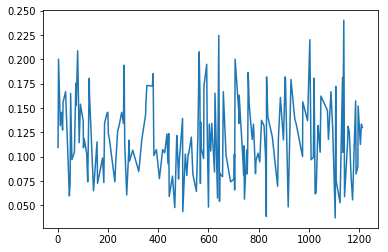

In [452]:
wholecells=out6.loc[out6.count_all >1]
plt.plot(wholecells.count_matched / wholecells.count_all)

In [ ]:
sq(Segment.id,subq.c.count).join(Umi).join(UmiGeneId).join(NcbiGene)\
    .filter(Segment.dsid==datasetId(dataset)).filter(NcbiGene.geneid==int(geneid_query))\
    .group_by(Segment.id).all()

In [187]:
session.query(NcbiGene).limit(10).all()

[<NcbiGene geneid=381, symbol='ARF5', desc='ADP ribosylation factor 5 [Source:HGNC Symbol;Acc:HGNC:658]'>,
 <NcbiGene geneid=2288, symbol='FKBP4', desc='FK506 binding protein 4 [Source:HGNC Symbol;Acc:HGNC:3720]'>,
 <NcbiGene geneid=2519, symbol='FUCA2', desc='fucosidase, alpha-L- 2, plasma [Source:HGNC Symbol;Acc:HGNC:4008]'>,
 <NcbiGene geneid=5898, symbol='RALA', desc='RAS like proto-oncogene A [Source:HGNC Symbol;Acc:HGNC:9839]'>,
 <NcbiGene geneid=55973, symbol='BCAP29', desc='B-cell receptor associated protein 29 [Source:HGNC Symbol;Acc:HGNC:24131]'>,
 <NcbiGene geneid=55971, symbol='BAIAP2L1', desc='BAI1 associated protein 2 like 1 [Source:HGNC Symbol;Acc:HGNC:21649]'>,
 <NcbiGene geneid=1856, symbol='DVL2', desc='dishevelled segment polarity protein 2 [Source:HGNC Symbol;Acc:HGNC:3086]'>,
 <NcbiGene geneid=79017, symbol='GGCT', desc='gamma-glutamylcyclotransferase [Source:HGNC Symbol;Acc:HGNC:21705]'>,
 <NcbiGene geneid=55615, symbol='PRR5', desc='proline rich 5 [Source:HGNC Sy

In [188]:

dataset = "5838205499823053"
geneid_query = 381
#API QUERY FOR UMIS BY GENEID
out1 = list(rsq(sq(Segment.id).join(Dataset)\
    .join(Umi).join(UmiGeneId).join(NcbiGene)\
      .filter(Dataset.id==datasetId(dataset)).filter(NcbiGene.geneid==int(geneid_query)).statement,db)\
        .id.values)